<a href="https://colab.research.google.com/github/BagusPanuluh/EnsembleLearning/blob/main/CaseBased3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/BagusPanuluh/EnsembleLearning/main/autos_mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [46]:
# Replace ? with NaN value
count=0
for i in range(0,398):
    for j in range(0,9):
        if (df.iloc[i,j]=='?'):
            count =count+1
print(count)
df = df.replace('?', np.NaN)

6


Text(0, 0.5, 'Count of NaN')

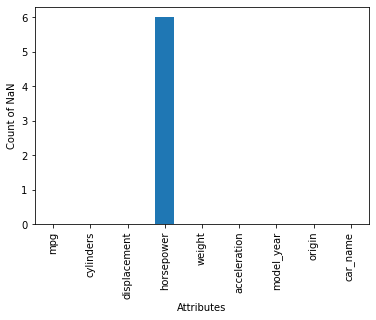

In [47]:
# Graphic of NaN
pd.isnull(df).sum().plot(kind='bar')
plt.xlabel('Attributes')
plt.ylabel('Count of NaN')

In [48]:
# Num of NaN
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [74]:
# Replace NaN with mean vlaues
colT = pd.to_numeric(df['horsepower'], errors='coerce').mean().astype(int)
print(colT)
df['horsepower'].replace([np.NaN], round(colT), inplace=True)
df['horsepower'] = pd.to_numeric(df['horsepower'])

104


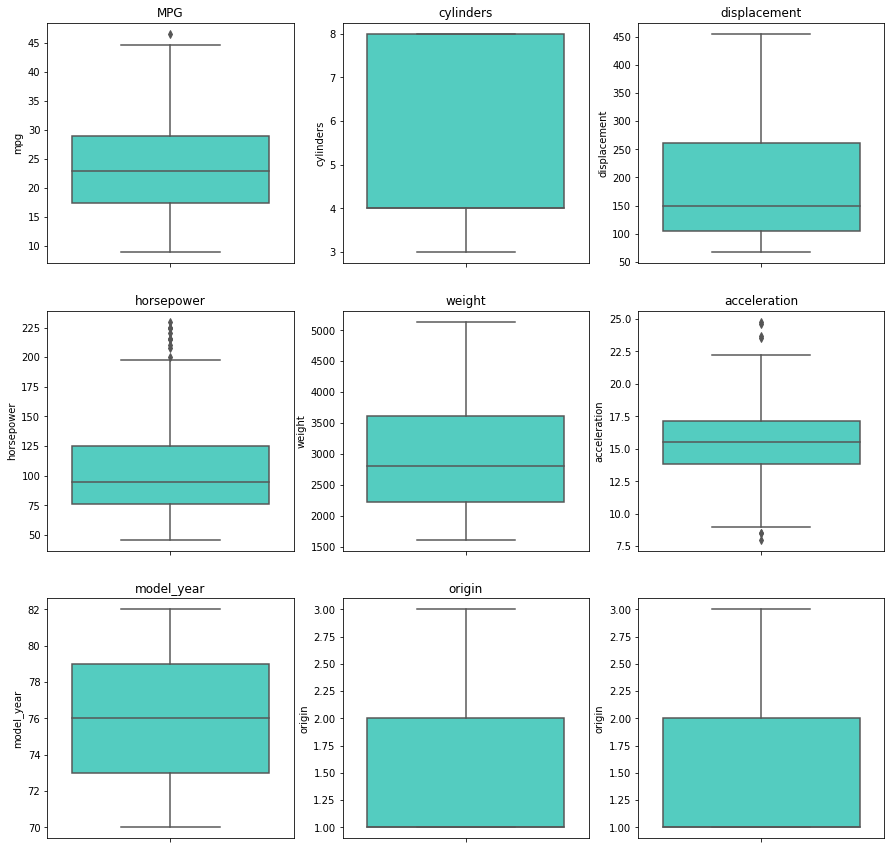

In [75]:
# Outliers Checking
fig, axe = plt.subplots(3, 3, figsize=(15, 15))

axe[0, 0].set_title('MPG')
box = sns.boxplot(y=df['mpg'], ax=axe[0, 0], color='turquoise')

axe[0, 1].set_title('cylinders')
box = sns.boxplot(y=df['cylinders'], ax=axe[0, 1], color='turquoise')

axe[0, 2].set_title('displacement')
box = sns.boxplot(y=df['displacement'], ax=axe[0, 2], color='turquoise')

axe[1, 0].set_title('horsepower')
box = sns.boxplot(y=df['horsepower'], ax=axe[1, 0], color='turquoise')

axe[1, 1].set_title('weight')
box = sns.boxplot(y=df['weight'], ax=axe[1, 1], color='turquoise')

axe[1, 2].set_title('acceleration')
box = sns.boxplot(y=df['acceleration'], ax=axe[1, 2], color='turquoise')

axe[2, 0].set_title('model_year')
box = sns.boxplot(y=df['model_year'], ax=axe[2, 0], color='turquoise')

axe[2, 1].set_title('origin')
box = sns.boxplot(y=df['origin'], ax=axe[2, 1], color='turquoise')

axe[2, 1].set_title('origin')
box = sns.boxplot(y=df['origin'], ax=axe[2, 2], color='turquoise')

plt.show()

In [78]:
# Choose the attributes without df[car_name] 'cuz its unique
columns_to_keep = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']
df = df[columns_to_keep]

In [90]:
# SPlitting
x = df.drop(['mpg'], axis=1)
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [91]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
228,6,250.0,98,3525,19.0,77,1
208,8,318.0,150,3940,13.2,76,1
220,4,85.0,70,1945,16.8,77,3
7,8,440.0,215,4312,8.5,70,1
212,8,350.0,180,4380,12.1,76,1
...,...,...,...,...,...,...,...
148,4,116.0,75,2246,14.0,74,2
249,8,260.0,110,3365,15.5,78,1
196,4,98.0,60,2164,22.1,76,1
67,8,429.0,208,4633,11.0,72,1


In [92]:
y_train

228    18.5
208    13.0
220    33.5
7      14.0
212    16.5
       ... 
148    26.0
249    19.9
196    24.5
67     11.0
390    32.0
Name: mpg, Length: 318, dtype: float64

In [109]:
# Create the base regressor
base_regressor = DecisionTreeRegressor(max_depth=4)

# Create the AdaBoost regressor
adaboost_regressor = AdaBoostRegressor(base_estimator=base_regressor, n_estimators=100)

In [110]:
# Fit the regressor to the training data

adaboost_regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=100)

In [111]:
# Make predictions on the test data
predictions = adaboost_regressor.predict(X_test)
pred = np.round(predictions, 1)
pred

array([35.1, 18.3, 33.6, 30.1, 24.1, 26.6, 15.4, 27.3, 18.8, 24.7, 15.1,
       24.8, 30.3, 15.8, 24.7, 23.6, 26.5, 13.5, 14.4, 19. , 33.6, 27.6,
       15.2, 29.5, 35.2, 27. , 21.9, 17.5, 13.5, 18. , 33.9, 26.1, 24.1,
       23.4, 29. , 29.7, 28. , 27.8, 26.2, 35.6, 35.8, 32.3, 13. , 18.3,
       17.5, 29.5, 30.1, 18.2, 23.8, 13.9, 33.9, 26.5, 26.2, 14.8, 31.6,
       23.5, 26. , 17.1, 23.3, 23.5, 17.2, 20. , 18.1, 21.2, 19.4, 14.8,
       17.3, 27. , 21.8, 18.8, 35.2, 25.2, 19. , 32.8, 35.3, 33.9, 24.3,
       27.2, 14.2, 14.5])

In [112]:
y_test

381    36.0
34     16.0
295    35.7
335    35.0
243    21.5
       ... 
383    38.0
77     22.0
360    30.7
69     12.0
159    14.0
Name: mpg, Length: 80, dtype: float64

In [113]:
# Evaluating with R2 Score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(f'R2 Score: {round(r2, 2)*100}%')

R2 Score: 87.0%
